No missing values in the dataset.


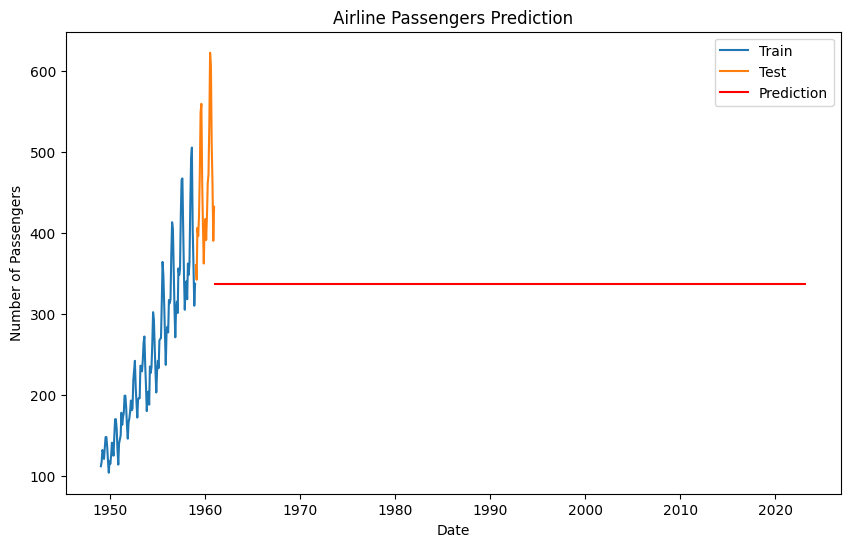

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the data
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv('datasets\\airline-passengers.csv', parse_dates=['Month'], index_col='Month')

# Check for missing values
if df.isnull().sum().sum() > 0:
    print("Dataset contains missing values.")
else:
    print("No missing values in the dataset.")

# Split the data into training and test sets
train = df[df.index.year < 1959]
test = df[df.index.year >= 1959]

# Fit the model
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit()

# Make prediction for the next 2 years
future_dates = pd.date_range(start='1961-01-01', end='2025-03-01', freq='MS')
future_forecast = model_fit.forecast(len(future_dates))

# Create a DataFrame for the future forecast
future_forecast_df = pd.DataFrame(future_forecast, index=future_dates, columns=['Passengers'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test')
plt.plot(future_forecast_df.index, future_forecast_df['Passengers'], label='Prediction', color='red')
plt.legend(loc='best')
plt.title('Airline Passengers Prediction')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()


No missing values in the dataset.


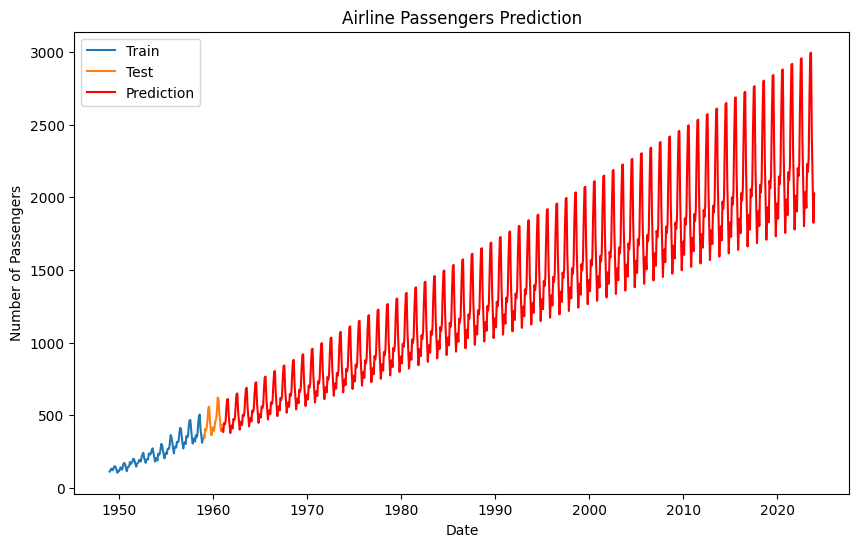

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the data
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df2 = pd.read_csv('datasets\\airline-passengers.csv', parse_dates=['Month'], index_col='Month')
# df2 = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Check for missing values
if df2.isnull().sum().sum() > 0:
    print("Dataset contains missing values.")
else:
    print("No missing values in the dataset.")

# Split the data into training and test sets
train = df2[df2.index.year < 1959]
test = df2[df2.index.year >= 1959]

# Fit the Holt-Winters model 
model = ExponentialSmoothing(train['Passengers'], seasonal='mul', trend='add', seasonal_periods=12)
model_fit = model.fit()

# Forecast for the next 2 years (1961-1963)
future_dates = pd.date_range(start='1961-01-01', end='2025-12-01', freq='MS')
future_forecast = model_fit.forecast(len(future_dates))

# Create a DataFrame for the future forecast
future_forecast_df = pd.DataFrame(future_forecast, index=future_dates, columns=['Passengers'])
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test')
plt.plot(future_forecast_df.index, future_forecast_df['Passengers'], label='Prediction', color='red')
plt.legend(loc='best')
plt.title('Airline Passengers Prediction')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()


In [16]:
df2

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461
